In [1]:
import json
from IPython.display import display
import spot
from spot.jupyter import display_inline
spot.setup()


In [2]:
prop_names={
    'Global Reachability':["Path always exists","G(match;send())","Safety"], 
    'Global non-reachability':["Path always does not exists","G(match;drop())","Safety"],
    'Future Reachability':["Path exists in future","F(match;send())","Liveness"],
    'Convergence/After':["In future, there is always a path","F(G(match;send()))","Liveness"], 
    'Conditional Reach./Precedence':["Path will exist if a condition is met aprior","F(p -> !p U(s & !p))","Liveness"],
    'Chain Events/Until':["Path will /will not exist until an event","p U q","Intersec."],
    'Chain Events2/Until':["Rate limiter can reduce from R1 to R2 to R3","p1 U p2 U p3","Intersec."],
    'Immediate Reachability':["If a condition is met, immediately path exists","p-> X q","Liveness"]
            }

print("\n********Table 1********\n")
print("{:<30} | {:<47} | {:<20}| {:<10}".format('Property Name','Explanation','Notation','Type'))
print()
for k,v in prop_names.items():
    print ("{:<30} | {:<47} | {:<20}| {:<10}".format(k,str(v[0]),str(v[1]),str(v[2])))
    
    
print("\n***ALL THESE PROPERTIES ARE GIVEN ATLEAST ONE EXAMPLE BELOW WITH NF TABLE, LTL PROPERTY and BA")


print("\n\n********Table 3************\n")
print("On each NF Table we can answer questions like:")
print("\t1. The NF forwards to which NFs?\n\t\t(**TODO: Can we answer some way pointing questions from here?)")
print("\t2. Does the NF manipulate any header fields?")
print("\t3. Which IPs are ever allowed through or blocked?")
print("\t4. Are two NF table equivalent?\n\t\t(**Note: We can check if their finite state machines are equivalent)")


********Table 1********

Property Name                  | Explanation                                     | Notation            | Type      

Global Reachability            | Path always exists                              | G(match;send())     | Safety    
Global non-reachability        | Path always does not exists                     | G(match;drop())     | Safety    
Future Reachability            | Path exists in future                           | F(match;send())     | Liveness  
Convergence/After              | In future, there is always a path               | F(G(match;send()))  | Liveness  
Conditional Reach./Precedence  | Path will exist if a condition is met aprior    | F(p -> !p U(s & !p))| Liveness  
Chain Events/Until             | Path will /will not exist until an event        | p U q               | Intersec. 
Chain Events2/Until            | Rate limiter can reduce from R1 to R2 to R3     | p1 U p2 U p3        | Intersec. 
Immediate Reachability         | If a conditi

In [3]:
firewalls={
     'R0': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':100,'dst_ip':101},
          'Action':'delete(R0),delete(R1),delete(R3),send(IDPS)'
         },
    'R1': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':101,'dst_ip':100},
          'Action':'delete(R0),delete(R1),delete(R4),drop()'
         },
    'R2': 
         {
          'Init':True,
          'Priority':50,
          'Match':{'src_ip':100,'dst_ip':101},
          'Action':'send(IDPS)'
         },
    'R3': 
         {
          'Init':True,
          'Priority':50,
          'Match':{'src_ip=':101,'dst_ip':100},
          'Action':'drop()'
         },
    'R4': 
         {
          'Init':True,
          'Priority':50,
          'Match':{'src_ip':101,'dst_ip':100},
          'Action':'send(IDPS)'
         },
    'R5': 
         {
          'Init':True,
          'Priority':10,
          'Match':'*',
          'Action':'send(IDPS)'
         }
    
   
}
# print(json.dumps(firewalls,indent=2))

fw_e2i_send_nw= "src_ip=101,dst_ip=100;send(IDPS)"
fw_e2i_send="((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5) )"
print("Network operator wants reachability 101->100, will specify as: ",fw_e2i_send_nw)
print("This reachability translates into fw table rules as: ",fw_e2i_send)



fw_i2e_send_nw= "src_ip=100,dst_ip=101;send(IDPS)"
fw_i2e_send="( R0 V (!R0 & R2) V (!R0 & !R2 & R5))"
print("\nNetwork operator wants reachability 100->101, will specify as: ",fw_i2e_send_nw)
print("This reachability translates into fw table rules as: ",fw_i2e_send)

fw_e2i_drop_nw= "src_ip=101,dst_ip=100;drop()"
fw_e2i_drop="((R1) V (!R1 & R3) )"
print("\nNetwork operator wants non-reachability 101->100, will specify as: ",fw_e2i_drop_nw)
print("This non-reachability translates into fw table rules as: ",fw_e2i_drop)

print("\n \nFrom here on every box is a property. \nThe property name, example, its ltl and Buhi Automata are printed.\n")

Network operator wants reachability 101->100, will specify as:  src_ip=101,dst_ip=100;send(IDPS)
This reachability translates into fw table rules as:  ((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5) )

Network operator wants reachability 100->101, will specify as:  src_ip=100,dst_ip=101;send(IDPS)
This reachability translates into fw table rules as:  ( R0 V (!R0 & R2) V (!R0 & !R2 & R5))

Network operator wants non-reachability 101->100, will specify as:  src_ip=101,dst_ip=100;drop()
This non-reachability translates into fw table rules as:  ((R1) V (!R1 & R3) )

 
From here on every box is a property. 
The property name, example, its ltl and Buhi Automata are printed.



[]((!(R1)) && (!(R3)) && (!(R4)) && (R5))
fw_p1_ba is safety automaton:  True
fw_p1_ba is liveness automaton: False
fw_p1_ltl is safety:  True
fw_p1_ltl is liveness:  False


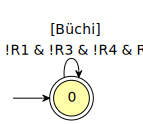

In [4]:
# Gloabal Reachability 
# Eg: In firewalls, G(src_ip=101,dst_ip=100;send(IDPS)). 
fw_p1_ltl= spot.formula('G((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5))')
fw_p1_ba=p1_ba = spot.translate(fw_p1_ltl, 'BA'); 
#fw_p1_ba=p1_ba = spot.translate(fw_p1_ltl, 'BA',"complete"); 

print(fw_p1_ltl.to_str('spin', parenth=True))

print("fw_p1_ba is safety automaton: ",spot.is_safety_automaton(fw_p1_ba))
print("fw_p1_ba is liveness automaton:",spot.is_liveness_automaton(fw_p1_ba))

print("fw_p1_ltl is safety: ",fw_p1_ltl.is_syntactic_safety())
print("fw_p1_ltl is liveness: ",spot.is_liveness(fw_p1_ltl))

fw_p1_ba

[]((!(R1)) && (R3))
safety automaton:  True
liveness automaton:  False
ltl is safety:  True
ltl is liveness:  False


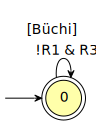

In [5]:
#Global Non-Reachability 
# Eg: In firewalls , G(src_ip=101,dst_ip=100;drop())
fw_p2_ltl= spot.formula('G((R1) V (!R1 & R3))')
fw_p2_ba= spot.translate(fw_p2_ltl, 'BA'); 
# fw_p2_ba= spot.translate(fw_p2_ltl, 'BA',"complete"); 

print(fw_p2_ltl.to_str('spin', parenth=True))

print("safety automaton: ",spot.is_safety_automaton(fw_p2_ba))
print("liveness automaton: ",spot.is_liveness_automaton(fw_p2_ba))

print("ltl is safety: ", fw_p2_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p2_ltl))

#prop
fw_p2_ba

<>([]((!(R1)) && (!(R3)) && (!(R4)) && (R5)))
is safety automaton:  False
is liveness automaton:  True
ltl is safety:  False
ltl is liveness:  True


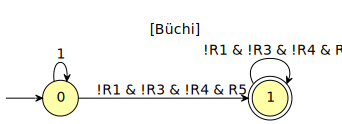

In [6]:
#Future Reachability
# Eg: In firewalls, F(src_ip=101,dst_ip=100;send(IDPS))
fw_p3_ltl= spot.formula('F((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5))')
fw_p3_ba = spot.translate(fw_p3_ltl, 'BA'); 
# = spot.translate(, 'BA',"complete"); 

print(fw_p3_ltl.to_str('spin', parenth=True))

print("is safety automaton: ",spot.is_safety_automaton(fw_p3_ba))
print("is liveness automaton: ",spot.is_liveness_automaton(fw_p3_ba))

print("ltl is safety: ", fw_p3_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p3_ltl))

#prop
fw_p3_ba

<>([]((!(R1)) && (!(R3)) && (!(R4)) && (R5)))
 is safety automaton:  False
 is liveness automaton: True
ltl is safety:  False
ltl is liveness:  True


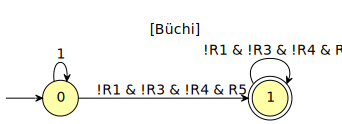

In [7]:
#Convergence1 or After
# Eg: In firewalls, F(G(src_ip=101,dst_ip=100;send(IDPS)))
fw_p4_ltl= spot.formula('F(G ((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5)))')
fw_p4_ba= spot.translate(fw_p4_ltl, 'BA'); 
# = spot.translate(fw_p4_ltl, 'BA',"complete"); 

print(fw_p4_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(fw_p4_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(fw_p4_ba))

print("ltl is safety: ", fw_p4_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p4_ltl))

#prop
fw_p4_ba

<>([]((!(R1)) && (!(R3)) && (!(R4)) && (R5)))
 is safety automaton:  False
 is liveness automaton: True
ltl is safety:  False
ltl is liveness:  True


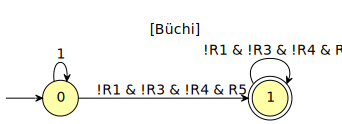

In [8]:
#Convergence2
# Eg: In firewalls, G(F(src_ip=101,dst_ip=100;send(IDPS)))
fw_p5_ltl= spot.formula('G(F ((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5)))')
fw_p5_ba= spot.translate(fw_p5_ltl, 'BA'); 
# fw_p5_ba = spot.translate(fw_p5_ltl, 'BA',"complete"); 

print(fw_p5_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(fw_p5_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(fw_p5_ba))

print("ltl is safety: ", fw_p5_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p5_ltl))

#prop
fw_p5_ba

<>((R0) || (R2) || (!(R5)))
 is safety automaton:  False
 is liveness automaton: True
ltl is safety:  False
ltl is liveness:  True


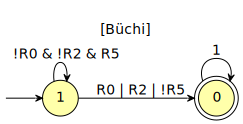

In [9]:
#Conditional reachability / Precedence
#Eg: only if a packet was sent from 100->101, Packet from 101->100 can be sent
#F(P -> !P U(S & !P))
#F(src=100,dst=101;send(IDPS) -> !(src=100,dst=101;send(IDPS)) U(src=101,dst=100;send(IDPS) & !(src=100,dst=101;send(IDPS))))

fw_p6_ltl=spot.formula('F(( R0 V (!R0 & R2) V (!R0 & !R2 & R5))-> (!( R0 V (!R0 & R2) V (!R0 & !R2 & R5)))U (((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5) ) & !(( R0 V (!R0 & R2) V (!R0 & !R2 & R5)))) )')
#fw_p6_ba= spot.translate(fw_p6_ltl, 'BA'); 
fw_p6_ba= spot.translate(fw_p6_ltl, 'BA',"complete"); 

print(fw_p6_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(fw_p6_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(fw_p6_ba))

print("ltl is safety: ", fw_p6_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p6_ltl))

#prop
fw_p6_ba

([]((!(R1)) && (R3))) U ([]((!(R0)) && (!(R2)) && (R5)))
 is safety automaton:  False
 is liveness automaton: False
ltl is safety:  False
ltl is liveness:  False
*****NOTE: This is intersection property and can be decomposed*****


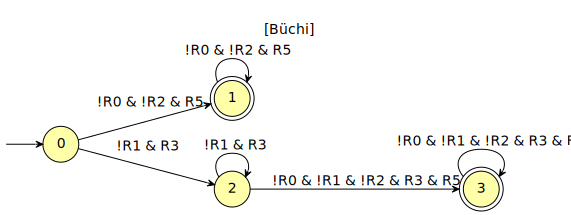

In [10]:
#Chain Events / Until
#Eg; Packets from 101->100 will be dropped until 100 sends to 101 
#i.e., src=D & dst=I;drop() U src=I & dst=D;send() 
fw_p7_ltl= spot.formula('((R1) V (!R1 & R3) ) U  ( R0 V (!R0 & R2) V (!R0 & !R2 & R5))')
fw_p7_ba= spot.translate(fw_p7_ltl, 'BA'); 
#fw_p7_ba= spot.translate(fw_p7_ltl, 'BA',"complete"); 

print(fw_p7_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(fw_p7_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(fw_p7_ba))

print("ltl is safety: ", fw_p7_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p7_ltl))

print("*****NOTE: This is intersection property and can be decomposed*****")
#pro
fw_p7_ba


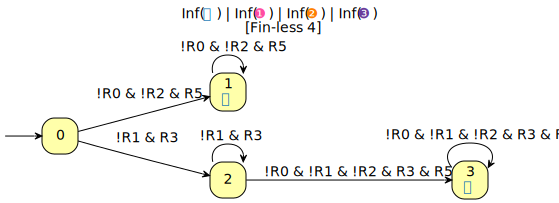

In [11]:
#Decomposing fw_p7_ba

#Safety Decomposer : Every cycle contains an infinite accepting state
#1.Delete all states from which no infinite accepting state is reachable
#2.Make all remaining states infinite accepting states

s_fw_p7=spot.scc_filter(fw_p7_ba)
s_fw_p7.set_acceptance(4,"(Inf(0) | Inf(1) | Inf(2) | Inf(3))")
s_fw_p7




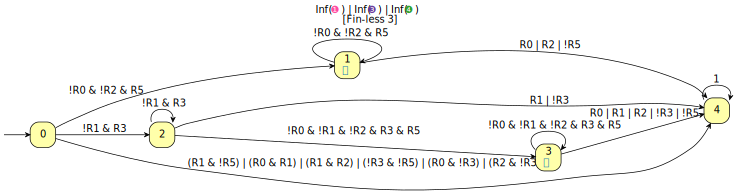

In [12]:
#Liveness Decomposer
#Step1: Delete states from which no infinite-accepting state is reachable
#Step2: Add new infinite accepting state qt that has a transition to itself on all input symbols
#Step3: For every state q that has an undefined transition on any input symbol s, add transition from q to qt under s

l_fw_p7=spot.complete(spot.scc_filter(fw_p7_ba))
l_fw_p7.set_acceptance(3, "(Inf(1) | Inf(3) | Inf(4))")
l_fw_p7

(<>((R0) || (R2) || (!(R5)))) || (X([]((!(R1)) && (!(R3)) && (!(R4)) && (R5))))
 is safety automaton:  False
 is liveness automaton: True
ltl is safety:  False
ltl is liveness:  True


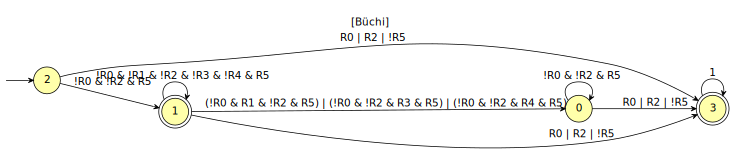

In [13]:
#Immediate reachability  (p-> X q)
#Eg: In firewalls, if 100 sent packet to 101 (src=100,dst=101;send) then immediately 101 can send packet to 100(src=101,dst=100;send())
# src=I & dst=D;send() -> X (src=D & dst=I;send()) 
fw_p8_ltl= spot.formula('( R0 V (!R0 & R2) V (!R0 & !R2 & R5)) -> X (((!R1 & !R3 & R4) V (!R1 & !R3 & !R4 & R5) ))')
fw_p8_ba= spot.translate(fw_p8_ltl, 'BA'); 
# = spot.translate(, 'BA',"complete"); 

print(fw_p8_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(fw_p8_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(fw_p8_ba))

print("ltl is safety: ", fw_p8_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(fw_p8_ltl))

#prop
fw_p8_ba

In [14]:
#rate_limiter
rl={
    'R0': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':100,'dst_ip':101,'count':[0,100]},
          'Action':'increment(count),send(A)'
         },
    'R1': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':100,'dst_ip':101,'count':[100,200]},
          'Action':'delete(R0),increment(count),send(B)'
         },
    'R2': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':100,'dst_ip':101,'count':'>200'},
          'Action':'delete(R1),increment(count),send(C)'
         }
    
}

(R0) U ((R1) U (R2))
 is safety automaton:  False
 is liveness automaton: False
ltl is safety:  False
ltl is liveness:  False

******NOTE: This is intersection and can be decomposed with same steps/cmds as earlier until example*********


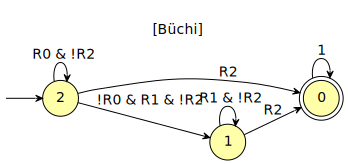

In [15]:
#Chain Events2
#Eg: User can send at initial rate of R1(the interface rate), 
#then can send at R2 and after using resources, sends at R3

rl_p1_ltl= spot.formula('R0 U R1 U R2')
rl_p1_ba= spot.translate(rl_p1_ltl, 'BA'); 
#rl_p1_ba= spot.translate(, 'BA',"complete"); 

print(rl_p1_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(rl_p1_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(rl_p1_ba))

print("ltl is safety: ", rl_p1_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(rl_p1_ltl))

print("\n******NOTE: This is intersection and can be decomposed with same steps/cmds as earlier until example*********")
#prop
rl_p1_ba


In [16]:
idps={
    'R0': 
         {
          'Init':False,
          'Priority':100,
          'Match':{'src_ip':'I'},
          'Action':'drop()'
         },
    'R1': 
         {
          'Init':False,
          'Priority':50,
          'Match':{'src_ip':'I','dst_ip':'D'},
          'Action':'add(R0),drop()'
         },
    'R2': 
         {
          'Init':False,
          'Priority':50,
          'Match':{'src_ip':'I','dst_ip':'F'},
          'Action':'add(R1),send()'
         },
    'R3': 
         {
          'Init':True,
          'Priority':40,
          'Match':{'dst_ip':'I','port':2222},
          'Action':'add(R2),send()'
         },
    'R4': 
         {
          'Init':True,
          'Priority':10,
          'Match':{'*'},
          'Action':'send()'
         }
    
    
}

In [17]:
#Host can send until malicious activity then it should be blocked immediately
#src=I;send() U (src=I,dst=D;drop()) -> src=I;drop()
# ((!R0&!R1&R2)V(!R0&!R1&!R2&R3)V(!R0&!R1&!R2&!R3&R4)) U R1 ->X (R0)

In [18]:
#load_balancer_round_robin
lb_rr={
    'R0': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':101,'dst_ip':100},
          'Action':'delete(R0),add(R1),modify(dst=A),send(A)'
         },
    'R1': 
         {
          'Init':False,
          'Priority':100,
          'Match':{'src_ip':101,'dst_ip':100},
          'Action':'delete(R1),add(R0),modify(dst=B),send(B)'
         }
    
}

[](((R0) && (!(R1))) || ((!(R0)) && (R1)))
 is safety automaton:  True
 is liveness automaton: False
ltl is safety:  True
ltl is liveness:  False


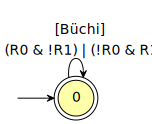

In [19]:
lb_p1_ltl= spot.formula('G(R0 xor R1)')
lb_p1_ba= spot.translate(lb_p1_ltl, 'BA'); 
#lb_p1_ba= spot.translate(, 'BA',"complete"); 

print(lb_p1_ltl.to_str('spin', parenth=True))

print(" is safety automaton: ",spot.is_safety_automaton(lb_p1_ba))
print(" is liveness automaton:",spot.is_liveness_automaton(lb_p1_ba))

print("ltl is safety: ", lb_p1_ltl.is_syntactic_safety())
print("ltl is liveness: ",spot.is_liveness(lb_p1_ltl))

#prop
lb_p1_ba

{'R0': {'Init': True, 'Priority': 100, 'Match': {'src_ip': 100, 'dst_ip': 101, 'c': [0, 100]}, 'Action': 'send()'}}
For a  packet with a src and dst ip, the packet is counted and sent always
G (src_ip=100,dst_ip=101;send())
[](R0)
couter_p1_ba is safety automaton:  True
couter_p1_ba is liveness automaton: False
couter_p1_ltl is safety:  True
couter_p1_ltl is liveness:  False


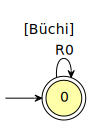

In [20]:
counter={
    'R0': 
         {
          'Init':True,
          'Priority':100,
          'Match':{'src_ip':100,'dst_ip':101,'c':[0,100]},
          'Action':'send()'
         }
    }
print(counter)
print("For a  packet with a src and dst ip, the packet is counted and sent always")
couter_p1= "G (src_ip=100,dst_ip=101;send())"
print(couter_p1)
couter_p1_ltl=spot.formula('G R0')
couter_p1_ba = spot.translate(couter_p1_ltl, 'BA'); 
#couter_p1_ba = spot.translate(couter_p1_ltl, 'BA',"complete"); 

print(couter_p1_ltl.to_str('spin', parenth=True))

print("couter_p1_ba is safety automaton: ",spot.is_safety_automaton(couter_p1_ba))
print("couter_p1_ba is liveness automaton:",spot.is_liveness_automaton(couter_p1_ba))

print("couter_p1_ltl is safety: ",couter_p1_ltl.is_syntactic_safety())
print("couter_p1_ltl is liveness: ",spot.is_liveness(couter_p1_ltl))

couter_p1_ba